# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mice_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_mice_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count = len(complete_mice_data["Mouse ID"].unique())
unique_mice_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicates = complete_mice_data[complete_mice_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the 'Mouse ID's that have duplicate values
duplicate_mouse_ids = duplicates['Mouse ID'].unique()

duplicate_mouse_ids



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mice = complete_mice_data[complete_mice_data['Mouse ID'].isin(duplicate_mouse_ids)]
all_data_for_duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_complte_mice_data = complete_mice_data[~complete_mice_data['Mouse ID'].isin(duplicate_mouse_ids)]
cleaned_complte_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count_clean = len(cleaned_complte_mice_data["Mouse ID"].unique())
unique_mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_by_drug_regimen = cleaned_complte_mice_data.groupby("Drug Regimen")
mean_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].mean()
median_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].median()
variance_tv_drug_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].var()
std_drug_tv_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].std()
sem_drug_tv_regimen = grouped_by_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_drug_regimen = pd.DataFrame({
    "Mean Tumor Volume"         : mean_tv_drug_regimen,
    "Median Tumor Volume"       : median_tv_drug_regimen,
    "Tumor Volume Variance"     : variance_tv_drug_regimen,
    "Tumor Volume Std. Dev."    : std_drug_tv_regimen,
    "Tumor Volume Std. Err."    : sem_drug_tv_regimen
})

summary_drug_regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Calculate the required statistics for each group
grouped_stats_agg = grouped_by_drug_regimen["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

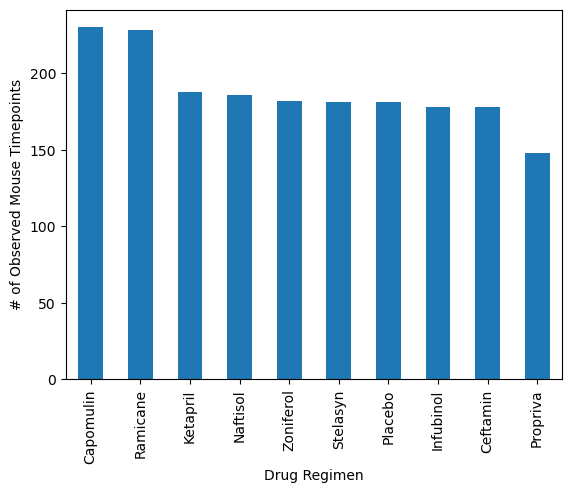

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = cleaned_complte_mice_data['Drug Regimen'].value_counts()

# Create the bar plot using the plot method of the Series object
regimen_counts.plot(kind='bar')

# Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Show the plot
plt.show()


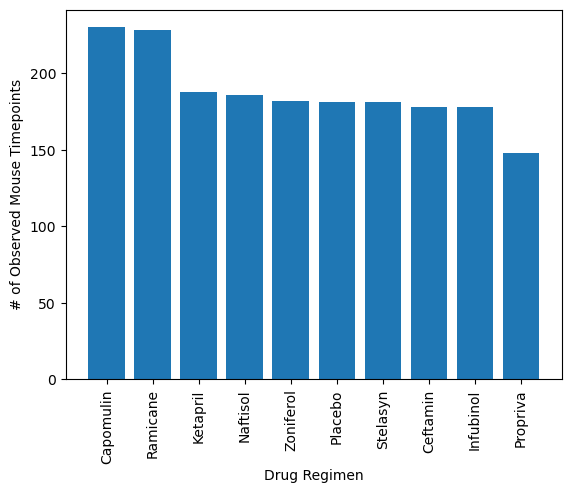

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimen_counts_per_mouse = grouped_by_drug_regimen["Mouse ID"].size()
sorted_drug_regimen_counts_per_mouse = drug_regimen_counts_per_mouse.sort_values(ascending=False)

# Add labels and title
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(sorted_drug_regimen_counts_per_mouse.index, sorted_drug_regimen_counts_per_mouse.values)

# Show the plot
plt.show()


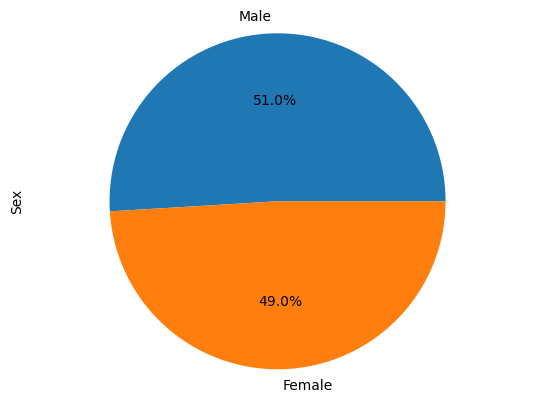

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count occurrences of each category in the "Sex" column
gender_counts = cleaned_complte_mice_data["Sex"].value_counts()

# Plot pie chart
gender_counts.plot(kind='pie', autopct="%1.1f%%")

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel("Sex")
plt.show()


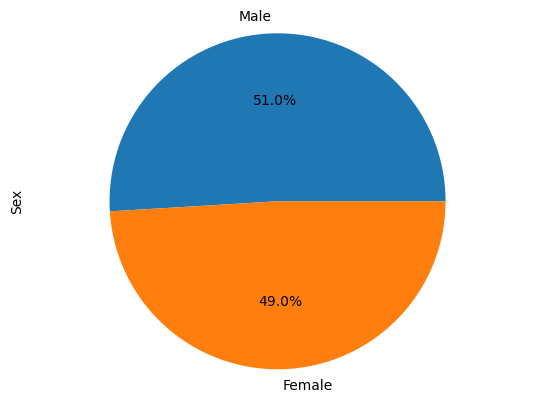

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# using the same gender_counts from above
plt.pie(gender_counts.values, labels=["Male", "Female"], autopct='%1.1f%%')

plt.axis("equal")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimens_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_filtered_df = cleaned_complte_mice_data[cleaned_complte_mice_data["Drug Regimen"].isin(drug_regimens_list)]

# Start by getting the last (greatest) timepoint for each mouse

# Determine the max indices for "Timepoint", grouped by "Mouse ID"
max_time_point_indices = regimen_filtered_df.groupby("Mouse ID")["Timepoint"].idxmax()

final_tumor_df = regimen_filtered_df.loc[max_time_point_indices, ["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
final_tumor_df = final_tumor_df.rename(columns={
    "Tumor Volume (mm3)"    : "Final Tumor Volume",
    "Timepoint"             : "Final Timepoint"
})

# final_tumor_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = pd.merge(regimen_filtered_df, final_tumor_df, how="left", on=["Mouse ID", "Mouse ID"])
final_merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume,Final Timepoint
0,b128,0,45.0,0,Capomulin,Female,9,22,38.982878,45
1,c326,0,45.0,0,Infubinol,Female,18,25,36.321346,5
2,c139,0,45.0,0,Infubinol,Male,11,28,72.226731,45
3,v339,0,45.0,0,Infubinol,Male,20,26,46.250112,5
4,a577,0,45.0,0,Infubinol,Female,6,25,57.031862,30


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
# drug_regimens_list from previous cell

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimens_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes_per_drug = final_merged_df[final_merged_df["Drug Regimen"] == drug]["Final Tumor Volume"]
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    Q1 = final_tumor_volumes_per_drug.quantile(0.25)
    Q2 = final_tumor_volumes_per_drug.median()
    Q3 = final_tumor_volumes_per_drug.quantile(0.75)
    IQR = Q3 - Q1

    outliers = final_merged_df[(final_merged_df["Drug Regimen"] == drug) &
                               (
                                    (final_merged_df["Final Tumor Volume"] > (Q3 + 1.5 * IQR)) |
                                    (final_merged_df["Final Tumor Volume"] < (Q1 - 1.5 * IQR))
                               )]["Final Tumor Volume"]
    tumor_volume_data.append([drug, Q1, Q2, Q3, len(outliers), outliers])

tumor_volume_data


[['Capomulin',
  32.37735684,
  37.718505085000004,
  40.1592203,
  0,
  Series([], Name: Final Tumor Volume, dtype: float64)],
 ['Ramicane',
  31.09533505,
  36.37451039,
  38.81036633,
  0,
  Series([], Name: Final Tumor Volume, dtype: float64)],
 ['Infubinol',
  57.03186187,
  62.276341445,
  66.19691151,
  2,
  1      36.321346
  154    36.321346
  Name: Final Tumor Volume, dtype: float64],
 ['Ceftamin',
  59.74190064,
  62.424189775,
  64.72983655,
  13,
  41     46.784535
  43     48.722078
  52     45.000000
  54     47.784682
  64     45.000000
  68     45.000000
  73     45.000000
  104    46.784535
  120    48.722078
  182    47.784682
  215    48.722078
  219    46.784535
  361    48.722078
  Name: Final Tumor Volume, dtype: float64]]

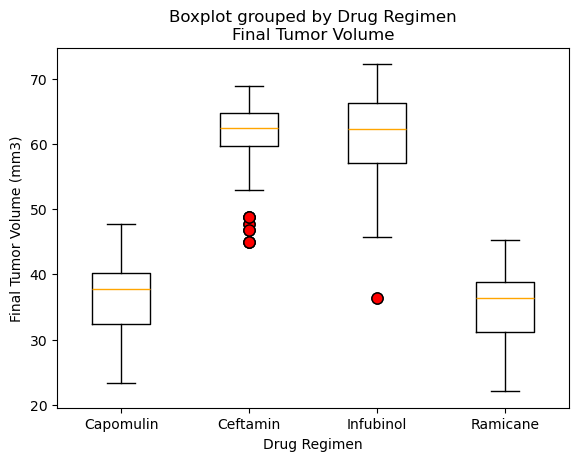

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_merged_df.boxplot(column='Final Tumor Volume',
                        by='Drug Regimen',
                        color=dict(
                            boxes='black',
                            whiskers='black',
                            medians='orange',
                            caps='black'
                            ),
                        flierprops=dict(
                            marker='o',
                            markerfacecolor='red',
                            markersize=8,
                            linestyle='none'
                            ),
                        grid=False
                        )

# Set labels and title
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

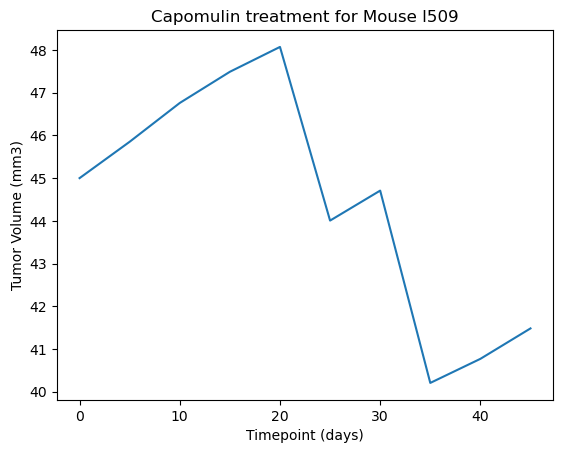

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
chosen_mouse_id = "l509"
data_for_chosen_mouse = final_merged_df[final_merged_df["Mouse ID"] == chosen_mouse_id]
data_for_capomulin = data_for_chosen_mouse[data_for_chosen_mouse["Drug Regimen"] == "Capomulin"]
data_for_capomulin.plot(x="Timepoint",
                        y="Tumor Volume (mm3)",
                        title="Capomulin treatment for Mouse l509",
                        xlabel="Timepoint (days)",
                        ylabel="Tumor Volume (mm3)",
                        legend=None)

plt.show()

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
